<img src="https://live.staticflickr.com/2588/4171571040_bab4a40acf_z.jpg" width="600" height="300">

# Support Vector Machine

Support vector machines (SVMs) are powerful yet flexible supervised machine learning algorithms which are used both for classification and regression. But generally, they are used in classification problems. In 1960s, SVMs were first introduced but later they got refined in 1990. SVMs have their unique way of implementation as compared to other machine learning algorithms. Lately, they are extremely popular because of their ability to handle multiple continuous and categorical variables.

**C parameter**

It acts as a parameter of regularization of the model. Controls the trade off between the correct classification of the elements in the training and the decision to maximize the margin. For large values of C, a small margin value will be accepted if the train observations are better classified. Small values will allow a larger margin, with a simpler decision function, at the cost of less precision

**Gamma parameter**

It is the parameter that controls the curvature of the decision boundary, it is used when using the kernel radial



**TABLE OF CONTENTS**

* [1.Support Vector Machine](#Support-Vector-Machine)
* [2.Best SVM](#Best-SVM)  
* [3.References](#References)

# Support Vector Machine

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import xgboost as xgb
import pickle
import seaborn as sns

from numpy import genfromtxt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.svm import SVC
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn import model_selection, metrics, linear_model
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
import scikitplot as skplt
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltimport 
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
import sklearn.metrics as skm

pd.set_option('display.max_columns', None)

In [2]:
X_train = pd.read_csv("../data/x_train.csv")
Y_train = pd.read_csv("../data/y_train.csv")
X_test = pd.read_csv("../data/x_train.csv")
Y_test = pd.read_csv("../data/y_train.csv")

Since data are not treated we load the pipeline

In [3]:
pp = '../pipelines/tratamiento1.sav'
preprocesador = pickle.load(open(pp, 'rb'))

In [4]:
modelo_svm = Pipeline(steps=[
    ('preprocesador', preprocesador),
    
    ('clasificador',SVC(max_iter = 1000, kernel = 'rbf',probability=True, C=1.5))])
modelo_svm.fit(X_train, Y_train)

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['int_rate', 'annual_inc', 'fico_range_low', 'fico_range_high',
       'pub_rec', 'total_acc', 'last_fico_range_high', 'last_fico_range_low',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_rcnt_rev_tl_op', 'mort_acc', 'num_bc_sats', 'num_tl_120dpd_2m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit'],
      dtype='object'))])),
     

In [5]:
modelo_svm.score(X_train, Y_train)

0.570488945486241

In [6]:
modelo_svm.score(X_test, Y_test)

0.570488945486241

And we predict

In [7]:
Y_pred = modelo_svm.predict(X_test)

Additionally, we predict the probability of being default or fully paid


In [8]:
Y_prob = modelo_svm.predict_proba(X_test)

In [9]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.32      0.65      0.43     81750
           1       0.82      0.54      0.65    241783

    accuracy                           0.57    323533
   macro avg       0.57      0.60      0.54    323533
weighted avg       0.69      0.57      0.60    323533



## ROCs Curve

 It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis

In [10]:
def roc(model, title):
    
    y_pred_prob = model.predict_proba(X_test)
    
    skplt.metrics.plot_roc(Y_test, y_pred_prob) 

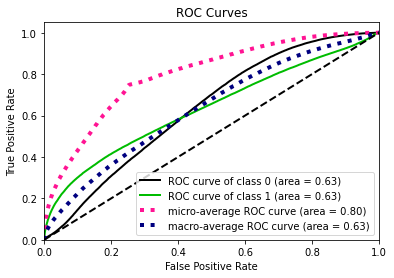

In [11]:
roc(modelo_svm, 'support vector machine')

## Confusion Matrix

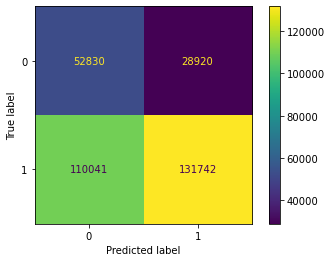

In [12]:
plot_confusion_matrix(modelo_svm, X=X_test, y_true=Y_test);

According to our confussion Matrix we can observe the following:

+ 52830 True Negatives.
+ 28920 False Positives.
+ 110041 False Negatives.
+ 131742 True Postives.


And we do observe the normalized confusion matrix


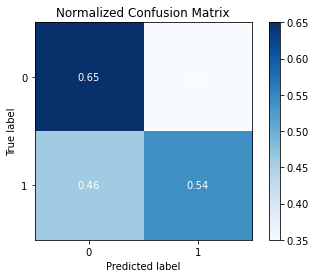

In [13]:

modelprediction_labels = modelo_svm.predict(X_test)
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, normalize=True);  

Its a very low value of accuraccy that can be translated to the confusion matrix, since we are interested on not giving the loan to people who is more likely to default. Here we can observe that theres a 35% of the people that we say that are good payers that are not, so its a considerable percentage.

## Cumulative gains

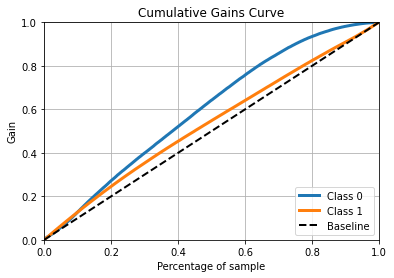

In [14]:

skplt.metrics.plot_cumulative_gain(Y_test, Y_prob);

Again, We see that it is much easier to look for defaulters than paying customers, since looking at 50% I have almost 60% of defaulters and only 50% of those who pay. As is expected since its an imbalanced dataset.


In [15]:
model = '../model/svm.sav'
pickle.dump(modelo_svm, open(model, 'wb'))

# References

https://scikit-learn.org/stable/modules/svm.html
